<a href="https://colab.research.google.com/github/mfavaits/YouTube-Series-on-Machine-Learning/blob/master/Covnets_Basics_with_Dropout_and_Data_Augmentation_Dogs_vs_Cats_Small_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import os
import shutil

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
train_datagen=ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
validation_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
train_generator=train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/training_2000', target_size=(150,150), batch_size=20, class_mode='binary')
validation_generator=validation_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/val_1000', target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
history=model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=20)




Epoch 1/100





100/100 [==============================] - 488s 5s/step - loss: 0.6931 - acc: 0.5180 - val_loss: 0.6871 - val_acc: 0.5175
Epoch 2/100
100/100 [==============================] - 150s 2s/step - loss: 0.6778 - acc: 0.5600 - val_loss: 0.6703 - val_acc: 0.5775
Epoch 3/100
100/100 [==============================] - 117s 1s/step - loss: 0.6707 - acc: 0.5870 - val_loss: 0.6779 - val_acc: 0.5900
Epoch 4/100
100/100 [==============================] - 117s 1s/step - loss: 0.6579 - acc: 0.6045 - val_loss: 0.6444 - val_acc: 0.5975
Epoch 5/100
100/100 [==============================] - 115s 1s/step - loss: 0.6479 - acc: 0.6140 - val_loss: 0.6561 - val_acc: 0.5975
Epoch 6/100
100/100 [==============================] - 117s 1s/step - loss: 0.6445 - acc: 0.6295 - val_loss: 0.6174 - val_acc: 0.6325
Epoch 7/100
100/100 [==============================] - 116s 1s/step - loss: 0.6380 - acc: 0.6305 - val_loss: 0.6083 - val_acc: 0.6600
Epoch 8/100
100/100 [==============================] -

In [0]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [0]:
epochs=range(1, len(acc)+1)

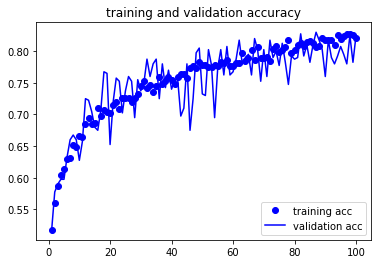

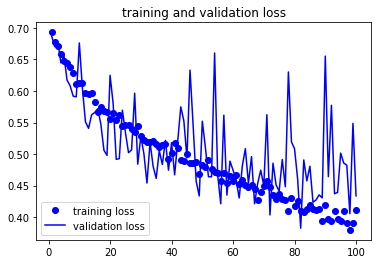

In [12]:
plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()